## Import Libraries

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read CSV Data

In [229]:
df = pd.read_csv('Projects/01. Regression/housePrice.csv')
df['Area'] = pd.to_numeric(df['Area'].str.replace(',', ''), errors='coerce')
print(f"Number of rows: {df.shape[0]}")
print(df.describe())
df.head()

Number of rows: 3479
               Area         Room         Price    Price(USD)
count  3.479000e+03  3479.000000  3.479000e+03  3.479000e+03
mean   8.744000e+06     2.079908  5.359023e+09  1.786341e+05
std    3.167266e+08     0.758275  8.099935e+09  2.699978e+05
min    3.000000e+01     0.000000  3.600000e+06  1.200000e+02
25%    6.900000e+01     2.000000  1.418250e+09  4.727500e+04
50%    9.000000e+01     2.000000  2.900000e+09  9.666667e+04
75%    1.200000e+02     2.000000  6.000000e+09  2.000000e+05
max    1.616000e+10     5.000000  9.240000e+10  3.080000e+06


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Clean Data

### Handle outlier prices

In [230]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for normal price values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cdf = df.copy()
# Create a new column to flag outliers
cdf['Price_Outlier'] = ((cdf['Price'] < lower_bound) | (cdf['Price'] > upper_bound))

# Remove the outliers from the original data
cdf = cdf[~cdf['Price_Outlier']]

# Drop the 'Price_Outlier' column if you no longer need it
cdf = cdf.drop(columns=['Price_Outlier'])
print(f"Number of rows after removing outliers: {cdf.shape[0]}")

Number of rows after removing outliers: 3169


### Remove Unknown Addresses

In [231]:
# Remove rows with missing addresses
cdf = cdf.dropna(subset=['Address'])
print(f"Number of rows after removing Unknown addresses: {cdf.shape[0]}")

Number of rows after removing Unknown addresses: 3146


### Clean Area

In [232]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Area column
Q1 = cdf['Area'].quantile(0.25)
Q3 = cdf['Area'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for normal price values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new column to flag outliers
cdf['Area_Outlier'] = ((cdf['Area'] < lower_bound) | (cdf['Area'] > upper_bound))

# Remove the outliers from the original data
cdf = cdf[~cdf['Area_Outlier']]

# Drop the 'Area_Outlier' column if you no longer need it
cdf = cdf.drop(columns=['Area_Outlier'])
print(f"Number of rows after removing outliers: {cdf.shape[0]}")

Number of rows after removing outliers: 3057


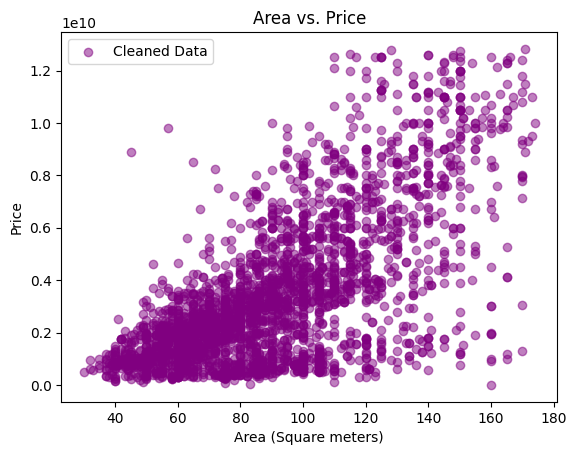

In [233]:
plt.scatter(cdf['Area'], cdf['Price'], color='purple', label='Cleaned Data', alpha=0.5)

# Add labels and title
plt.xlabel('Area (Square meters)')
plt.ylabel('Price')
plt.title('Area vs. Price')

# Add a legend
plt.legend()

plt.show()

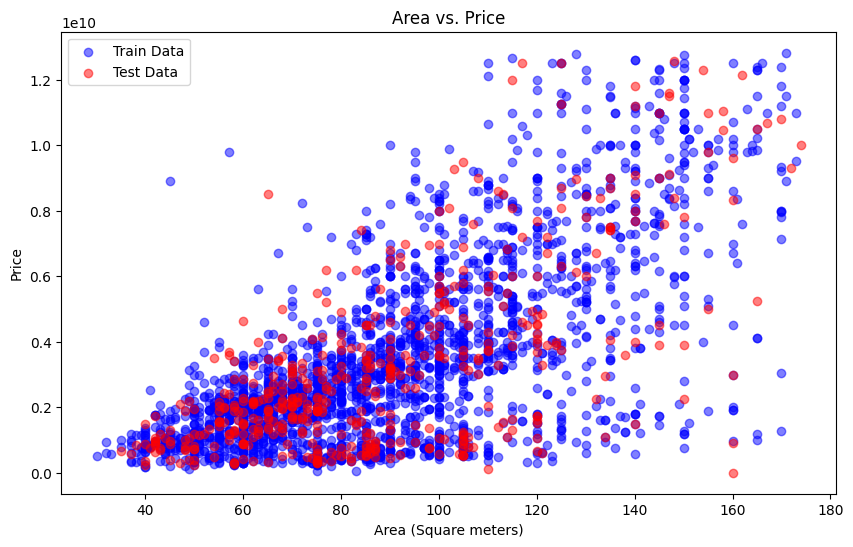

In [234]:
msk = np.random.rand(len(cdf)) < 0.85
train = cdf[msk]
test = cdf[~msk]

plt.figure(figsize=(10,6))  # Adjust the figure size for better visibility
plt.scatter(train['Area'], train['Price'], color='blue', label='Train Data', alpha=0.5)
plt.scatter(test['Area'], test['Price'], color='red', label='Test Data', alpha=0.5)


# Add labels and title
plt.xlabel('Area (Square meters)')
plt.ylabel('Price')
plt.title('Area vs. Price')

# Add a legend to differentiate between the datasets
plt.legend()

plt.show()

In [235]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y_train = np.asanyarray(train[['Price']])

regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 6.58039151e+07 -4.04977885e+08  7.60694902e+08  4.17831286e+08
   2.89607055e+08]]
Intercept:  [-2.99917908e+09]


In [236]:
# Prepare testing data
x_test = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
y_test = np.asanyarray(test[['Price']])

# Make predictions
y_hat = regr.predict(x_test)

# Calculate and print the explained variance score
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: 0.46
